# Exercise 3
(c) 2017 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).`

*This exercise was generated from a Jupyter notebook.  You can download the notebook [here](e03.ipynb).*

In [1]:
import numpy as np

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Exercise 3.1: Complete practice

If you have not already, complete the exercises from [Lessons 23 and 24](../lessons/l23-24_practice_with_numpy_2.html).

<br />

## Exercise 3.2: Data collapse

Rob Phillips wrote a review paper a couple of years ago that I enjoyed entitled ["Napoleon is in Equilibrium."](http://www.rpgroup.caltech.edu/publications/NapoleonEquilibrium.pdf). In the paper, he demonstrated that when you plot data in a certain way, they demonstrate **data collapse**. The idea here is that if you choose the right thing to plot on the $x$ and $y$ axes, data from a variety of sources collapse onto a single universal curve. In this exercise, you will hone your NumPy and Matplotlib skills in making plots exhibiting data collapse along the way. 

This analysis comes from Rob's paper, and the data come from [Daber, Sochor, and Lewis, *J. Mol. Biol.*, **409**, 76–87, 2011](http://www.ncbi.nlm.nih.gov/pubmed/21459098). The authors were studying how different mutants of the lac repressor affect gene expression. They hooked the lac promoter up to a fluorescent protein reporter. They then made a mutant with no lac repressor to get a measurement of the gene expression level (quantified by the fluorescent signal) in the absence of repressor. Then then looked at how the presence of a repressor served to decrease the expression level of the lac gene. The ratio of the repressed fluorescence to the totally unrepressed fluorescence is the **fold change** in repression. They can block repression by adding IPTG, which binds the lac repressor, rendering it ineffective at repressing gene expression (so IPTG is called an "inducer," since it turns on gene expression). So, for a given experiment, the authors measured fold change as a function of IPTG concentration. They measured the fold change for wild type, plus two mutants, Q18M and Q18A.

We will not derive it here (it comes from a generalization of the [Monod-Wyman-Changeux model](https://en.wikipedia.org/wiki/Monod-Wyman-Changeux_model)), but the theoretical expression for the fold change as a function of IPTG concentration, $c$, is

\begin{align}
\text{fold change} = \left[1 + \frac{\frac{R}{K}\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2}{\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2 + K_\mathrm{switch}\left(1 + c/K_\mathrm{d}^\mathrm{I}\right)^2}\right]^{-1}.
\end{align}

The parameters are:

|Parameter|Description|Value|Units|
|:--:|:--:|:--:|:--:|
|$K_\mathrm{d}^\mathrm{A}$|dissoc. const. for active repressor binding IPTG|0.017|mM$^{-1}$|
|$K_\mathrm{d}^\mathrm{I}$|dissoc. const. for inactive repressor binding IPTG|0.002|mM$^{-1}$|
|$K_\mathrm{switch}$|equil. const. for switching active/inactive|5.8|---|
|$K$|dissoc. const. for active repressor binding operator|?|mM$^{-1}$|
|$R$|number of repressors in cell|?|---|

The values of $K_\mathrm{d}^\mathrm{A}$, $K_\mathrm{d}^\mathrm{I}$, and $K_\mathrm{switch}$ were measured in the Daber, Sochor, and Lewis paper, and, as I mentioned before, are the same for all mutants. You can see in the expression for the fold change that $R$ and $K$ always appear as a ratio, $R/K$, so we can only determine this *ratio*, $R/K$, for each mutant. They are, for the respective mutants:

|Mutant|$R/K$|
|:--:|:--:|
|WT|141.5 mM$^{-1}$|
|Q18A|16.56 mM$^{-1}$|
|Q18M|1332 mM$^{-1}$|

Now let's get started with the analysis.

**a)** Load in the three data sets. They are in the files `~/git/data/wt_lac.csv`, `~/git/data/q18m_lac.csv`, and `~/git/data/q18a_lac.csv`. Be sure to check out the files on the command line to see what kwargs you need for `np.loadtxt()` to load them in.

**b)** Make a plot of fold change vs. IPTG concentration for each of the three mutants. Think: should any of the axes have a logarithmic scale?

**c)** Write a function with the signature `fold_change(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8)` to compute the theoretical fold change. It should allow `c`, the concentration of IPTG, to be passed in as a NumPy array or scalar, and `RK`, the $R/K$ ratio, must be a scalar. Remember, with NumPy arrays, you don't have to write **`for`** loops to do operations to each element of the array.

**d)** You will now plot a smooth curve showing the theoretical fold change for each mutant. 
>1. Make an array of closely spaced points for the IPTG concentration. *Hint*: The function `np.logspace()` will be useful.
2. Compute the theoretical fold change based on the given parameters using the function you wrote in part (c).
3. Plot the smooth curves on the same plot with the data. Don't forget to properly annotate your plot with axis labels and a legend.

**e)** If we look at the functional form of the fold change and at the parameters we are given, we see that only $R/K$ varies from mutant to mutant. I told you this *a priori*, but we didn't really know it. Daber, Sochol, and Lewis assumed that the binding to IPTG would be unaltered and the binding to DNA would be altered based on the position of the mutation in the lac repressor protein. Now, *if* this is true, then $R/K$ should be the only thing that varies. We can check this by seeing if the data collapse onto a single curve. To see how this works, we define the **Bohr parameter**, $F(c)$, as

\begin{align}
F(c) = -\ln\left(R/K\right) - \ln\left(\frac{\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2}{\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2 + K_\mathrm{switch}\left(1 + c/K_\mathrm{d}^\mathrm{I}\right)^2}\right).
\end{align}

The second term in the Bohr parameter is independent of the identity of the mutant, and the first term depends entirely upon it. Then, the fold change can be written as

\begin{align}
\text{fold change} = \frac{1}{1 + \mathrm{e}^{-F(c)}}.
\end{align}

So, if we make our $x$-axis be the Bohr parameter, all data should fall on the *same* curve. Hence the term, data collapse. (The Bohr parameter gets its name (as given by Rob Phillips) because it is inspired by the work of Christian Bohr (Niels's father), who discovered similar families of curves describing binding of oxygen to hemoglobin.)

Now, we will plot the theoretical curve of fold change versus Bohr parameter. 
>1. Write a function with call signature `bohr_parameter(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8)` that computes the Bohr parameter.
2. Write a function with call signature `fold_change_bohr(bohr_parameter)` that gives the fold change as a function of the Bohr parameter. 
3. Generate values of the Bohr parameter ranging from $-6$ to $6$ in order to make a smooth plot.
4. Compute the theoretical fold change as a function of the Bohr parameter and plot it as a gray line using `plt.plot()`'s kwarg `color='gray'`.

**f)** Now, for each experimental curve:
>1. Convert the IPTG concentration to a Bohr parameter using the given parameters.
2. Plot the experimental fold change versus the Bohr parameter you just calculated. Plot the data as dots on the same plot that you made the universal gray curve, making sure to appropriately annotate your plot.

Do you see data collapse? Does it make sense only binding to the operator is changing from mutant to mutant? And importantly, the collapse demonstrates that all of the mutants are behaving according to the Monod-Wyman-Changeux model, and the mutations affect quantitative, not qualitative, changes in the behavior of the repressor.

<br />

## Exercise 3.3: Making "formal" ECDF plots

We have plotted ECDFs with dots representing each measured point so far. This is perfectly legitimate and the meaning of each point on the plot is unambiguous. However, the thing we are plotting is not the *formal* definition of an ECDF. Formally, the ECDF, $\hat{F}(x)$, is defined as

\begin{align}
\hat{F}(x) = \frac{\text{number of entries in data set} \le x}{n},
\end{align}

where $n$ is the number of data points. Note that $x$ can take continuous values. So, if we had a data set $x = [1, 2, 3, 4]$, we would have

\begin{align}
\hat{F}(2.1) = \hat{F}(2.7) = \hat{F}(3) = 1/2,
\end{align}

and $\hat{F}(3.000000000001) = 3/4$. So, if we were to plot this formal ECDF, we should plot it as a line that looks like a staircase. To see how this relates to the dot-based ECDFs we have been plotting, below is an example of a formal ECDF with our dot-ECDF overlaid, for the time between earthquakes of magnitude 8 or greater on the Nankai Trough off the eastern coast of Japan.

![Nankai trough inter-earthquake times](nankai_trough.png)

So, the dots appear on the "right-hand turn" corners of the formal ECDF.

You task is to write a function that will generated $x$ and $y$ values for plotting an ECDF, either as a formal ECDF or as dots. The signature and doc string that specify your function are below.

In [2]:
def ecdf(data, formal=False, buff=0.1, min_x=None, max_x=None):
    """
    Generate `x` and `y` values for plotting an ECDF.

    Parameters
    ----------
    data : array_like
        Array of data to be plotted as an ECDF.
    formal : bool, default False
        If True, generate `x` and `y` values for formal ECDF.
        Otherwise, generate `x` and `y` values for "dot" style ECDF.
    buff : float, default 0.1
        How long the tails at y = 0 and y = 1 should extend as a
        fraction of the total range of the data. Ignored if
        `formal` is False.
    min_x : float, default None
        Minimum value of `x` to include on plot. Overrides `buff`.
        Ignored if `formal` is False.
    max_x : float, default None
        Maximum value of `x` to include on plot. Overrides `buff`.
        Ignored if `formal` is False.

    Returns
    -------
    x : array
        `x` values for plotting
    y : array
        `y` values for plotting
    """

<br />

## Exercise 3.4: Solving differential equations with NumPy

In addition to handling data, NumPy allows you do to *simulations*. For this exercise, we will use Euler's method to simulate a classic model for predator-prey population dynamics, the [Lotka-Volterra model](https://en.wikipedia.org/wiki/Lotka–Volterra_equations). As a warm-up example, we will simulate bacterial growth.

Bacterial growth can be modeled by the differential equation

\begin{align}
\frac{\mathrm{d}n}{\mathrm{d}t} = k n,
\end{align}

where $n$ is the number of bacteria and $k$ is the growth rate. The idea here is that the number of bacteria will grow faster the more bacteria we have, because there are more to divide. Analytically, we know the solution to this differential equation is

\begin{align}
n(t) = n_0 \mathrm{e}^{kt},
\end{align}

i.e., exponential growth. But suppose we did not know how to derive that. We could *simulate* the differential equation. We do this by discretizing time. Instead of a derivative, we have a change in $n$ over a change in time $t$.

\begin{align}
\frac{\mathrm{d}n}{\mathrm{d}t} \approx \frac{\Delta n}{\delta t} = k n.
\end{align}

Let's say we know $n$ and time zero, $n(0)$. Then $n$ at time $t = \Delta t$ is

\begin{align}
n(\Delta t) \approx n(0) + \Delta n = n(0) + k n(0).
\end{align}

More generally, we can write

\begin{align}
\frac{\mathrm{d}n}{\mathrm{d}t} = f(n),
\end{align}

and

\begin{align}
n(t+\Delta t) \approx n(t) + \Delta t\,f(n).
\end{align}

So, we can instruct Python to take our current value of $n$, and then add $\Delta t$ times $f(n)$ to get our new $n$ at a time just a bit later on, at $t + \Delta t$. We repeat this over and over again to move forward in time. Let's code that up!

In [3]:
# Specify parameter
k = 1

# Specify my little time step
delta_t = 0.01

# Make an array of time points, evenly spaced up to 10
t = np.arange(0, 10, delta_t)

# Make an array to store the number of bacteria
n = np.empty_like(t)

# Set the initial number of bacteria
n[0] = 100

# Write a for loop to keep updating n as time goes on
for i in range(1, len(t)):
    n[i] = n[i-1] + delta_t * k * n[i-1]

Ok! We just computed the time points and the number of bacteria, so we can just plot the result!

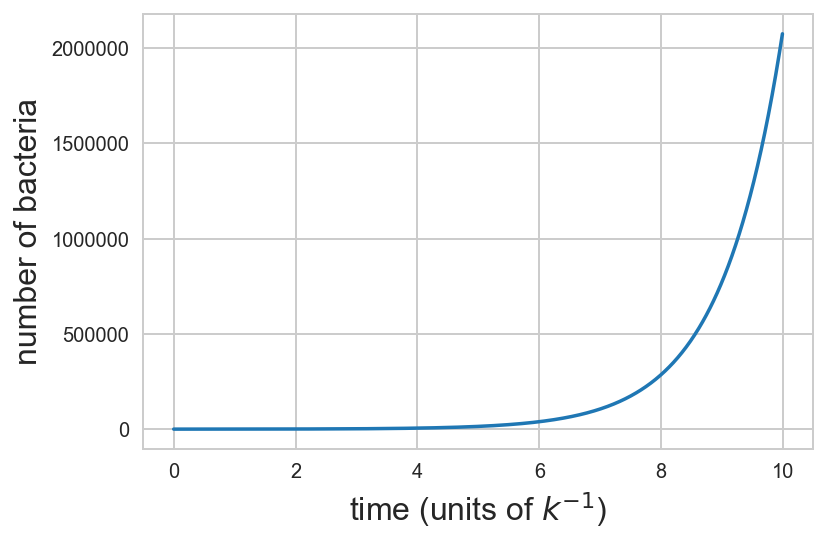

In [4]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('time (units of $k^{-1}$)')
ax.set_ylabel('number of bacteria')
_ = ax.plot(t, n)

And there is the famous exponential growth!

This time stepping method is called [Euler's method](https://en.wikipedia.org/wiki/Euler_method), and what we're doing is called *numerical solution of a differential equation*.

**a)** Now it's time to simulate the Lotka-Volterra model. Since predator and prey both begin with "p," we'll call the predators foxes ($f$) and the prey rabbits ($r$). The differential equation describing the dynamics of the rabbit population is

\begin{align}
\frac{\mathrm{d}r}{\mathrm{d}t} = \alpha r - \beta f r.
\end{align}

The first term at the right hand side is exponential growth, the same you would expect for a growing bacterial colony. The second term is killing off due to predation. If $f$ is large, more rabbits get hunted down.

The differential equation describing the dynamics of the fox population is

\begin{align}
\frac{\mathrm{d}f}{\mathrm{d}t} = \delta f r - \gamma f.
\end{align}

The first term represents growth in the fox population by consumption of rabbits. The second term is the natural die-off of foxes.

Your task in this exercise is to numerically solve these two differential equations together and then plot the result. Use the following parameter values

    alpha = 1
    beta = 0.2
    delta = 0.3
    gamma = 0.8
    delta_t = 0.001
    t = np.arange(0, 60, delta_t)
    r[0] = 10
    f[0] = 1

Even though there are now two differential equations, the procedure is the same, you update each by adding $\Delta t$ times the respective derivative.

When you plot the result, does it make sense?

**b)** [*Bonus*]  Euler's method is probably the simplest way to solve differential equations, and is by no means the best. SciPy has an ODE solver, `scipy.integrate.odeint()` that uses the more sophisticated and robust methods for solving systems of ODEs. Read the documentation about how `scipy.integrate.odeint()` works and use it to solve the Lotka-Volterra system of ODEs.

This problem is tough; I'm not giving you directions, and you are kind of on your own to read the documentation and figure it out. It may be useful to read [this tutorial](http://be150.caltech.edu/2017/handouts/intro_to_python_for_systems_biology.html) I wrote to help students solve ODEs that come up in systems biology.